In [ ]:
from gensim import models

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # For prettier plots. Seaborn takes over pandas' default plotter
import nltk
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

pyLDAvis.enable_notebook()
%matplotlib inline

In [3]:
review = pd.read_csv('../../../data/interim/clean_US_cities/2016_review.csv')

In [ ]:
review = pd.read_csv('../../../data/interim/clean_US_cities/review_clean.csv')

In [7]:
# How many businesses?

len(review['business_id'].unique())

105893

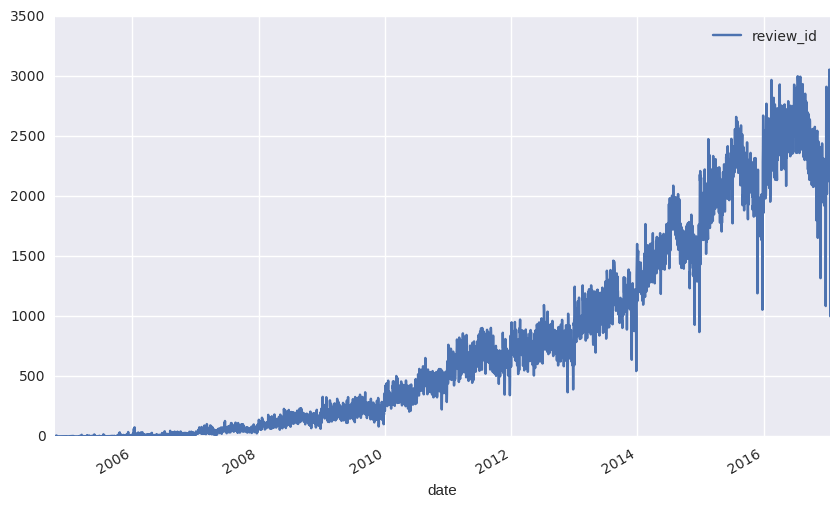

In [100]:
# Number of reviews by date
# The sharp seasonal falls are Chrismas Day and New Year's Day
# The sharp seasonal spikes are in summer, where people presumably have more free time

review.groupby('date').agg({'review_id': len}).reset_index().plot(x='date', y='review_id', figsize=(10,6))

In [18]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393275 entries, 0 to 393274
Data columns (total 10 columns):
business_id    393275 non-null object
cool           393275 non-null int64
date           393275 non-null object
funny          393275 non-null int64
review_id      393275 non-null object
stars          393275 non-null float64
text           393275 non-null object
type           393275 non-null object
useful         393275 non-null int64
user_id        393275 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 30.0+ MB


In [6]:
review.describe()

,cool,funny,stars,useful
count,3.457015e+06,3.457015e+06,3.457015e+06,3.457015e+06
mean,5.461839e-01,4.455893e-01,3.741661e+00,1.048886e+00
std,2.035434e+00,1.832262e+00,1.428476e+00,2.744492e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,5.130000e+02,6.320000e+02,5.000000e+00,1.125000e+03


In [63]:
review['text'][0]

'A Superficial place in Treasure Island, trying too hard to be upscale, however, the food quality does not meet its price tag, which is way overly priced.  Fast food quality, price higher than TAO, go figure. Staff also try too hard and gets annoying. No wonder their business is not good at all. TI is not an upscale place to visit either...'

In [4]:
review = review.fillna('')
review.isnull().sum()

business_id    0
cool           0
date           0
funny          0
review_id      0
stars          0
text           0
type           0
useful         0
user_id        0
dtype: int64

In [5]:
tvec = TfidfVectorizer(stop_words='english', min_df=10, max_df=0.5, max_features=100,
                       norm='l2', 
                       strip_accents='unicode'
                       )
review_dtm_tfidf = tvec.fit_transform(review['text'])

cvec = CountVectorizer(stop_words='english', min_df=10, max_df=0.5, max_features=100,
                       strip_accents='unicode')
review_dtm_cvec = cvec.fit_transform(review['text'])

print review_dtm_tfidf.shape, review_dtm_cvec.shape

(393275, 100) (393275, 100)


In [6]:
# Fitting LDA models

# On cvec DTM
lda_cvec = LatentDirichletAllocation(n_topics=15, random_state=42)
lda_cvec.fit(review_dtm_cvec)

# On tfidf DTM
lda_tfidf = LatentDirichletAllocation(n_topics=15, random_state=42)
lda_tfidf.fit(review_dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=15, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [34]:
lda_viz_20_topics_cvec = pyLDAvis.sklearn.prepare(lda_cvec, review_dtm_cvec, cvec)
lda_viz_20_topics_cvec

# Presentation notes:
# - Topics sorted by number of tokens or words

# Stuff:
# Distribution of topics to documents. Columns are "document_number", "t1", "t2", "t3", ..."tn" giving the % of 

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      15.491808        1       1  0.326235  0.011202
14      8.773061        1       2  0.227103 -0.033946
1       8.385319        1       3  0.101721 -0.158969
4       7.882046        1       4  0.074626  0.206206
10      6.520528        1       5 -0.096955 -0.253247
12      6.054417        1       6  0.212460  0.036051
11      5.174445        1       7  0.009070 -0.219484
18      4.589276        1       8  0.182603  0.014022
16      4.101141        1       9  0.066819  0.001182
13      3.524955        1      10 -0.115916 -0.081406
2       3.509132        1      11 -0.091046 -0.071726
19      3.256586        1      12 -0.065410  0.047828
17      3.238941        1      13 -0.052522 -0.195779
0       3.053135        1      14 -0.094312  0.175511
7       2.990385        1      15 -0.235130 -0.136637
15      2.919818        1      16 -0.009073  0.096624
3       2.919670        1      17 -0.141911  0.130023
5       2.592219        1      18 -0.146537  0.196382
8       2.559759        1      19 -0.125555  0.124996
6       2.463361        1      20 -0.026271  0.111167, topic_info=     Category           Freq        Term          Total  loglift  logprob
term                                                                     
30    Default  170527.000000        food  170527.000000  30.0000  30.0000
75    Default  149253.000000     service  149253.000000  29.0000  29.0000
36    Default  165611.000000       great  165611.000000  28.0000  28.0000
91    Default   88114.000000       vegas   88114.000000  27.0000  27.0000
62    Default  169483.000000       place  169483.000000  26.0000  26.0000
34    Default  159533.000000        good  159533.000000  25.0000  25.0000
7     Default   72720.000000        best   72720.000000  24.0000  24.0000
1     Default   62870.000000     amazing   62870.000000  23.0000  23.0000
50    Default   59301.000000        love   59301.000000  22.0000  22.0000
84    Default  136481.000000        time  136481.000000  21.0000  21.0000
10    Default   67549.000000        came   67549.000000  20.0000  20.0000
28    Default   52993.000000  experience   52993.000000  19.0000  19.0000
13    Default   48107.000000     chicken   48107.000000  18.0000  18.0000
68    Default   49138.000000  restaurant   49138.000000  17.0000  17.0000
55    Default   46614.000000         new   46614.000000  16.0000  16.0000
20    Default   46560.000000   delicious   46560.000000  15.0000  15.0000
58    Default   54793.000000       order   54793.000000  14.0000  14.0000
90    Default   67430.000000          ve   67430.000000  13.0000  13.0000
21    Default   63967.000000         did   63967.000000  12.0000  12.0000
70    Default   48181.000000        room   48181.000000  11.0000  11.0000
89    Default   50002.000000         try   50002.000000  10.0000  10.0000
43    Default  118271.000000        like  118271.000000   9.0000   9.0000
77    Default   58445.000000       staff   58445.000000   8.0000   8.0000
52    Default   38589.000000        menu   38589.000000   7.0000   7.0000
57    Default   36685.000000       night   36685.000000   6.0000   6.0000
92    Default   43086.000000        wait   43086.000000   5.0000   5.0000
64    Default   37508.000000       price   37508.000000   4.0000   4.0000
26    Default   35902.000000         eat   35902.000000   3.0000   3.0000
17    Default   39095.000000    customer   39095.000000   2.0000   2.0000
59    Default   53640.000000     ordered   53640.000000   1.0000   1.0000
...       ...            ...         ...            ...      ...      ...
72    Topic20       0.054719       sauce   25040.337179  -9.3302 -14.6118
78    Topic20       0.054719       stars   25252.631591  -9.3386 -14.6118
74    Topic20       0.054719      server   25470.647042  -9.3472 -14.6118
29    Topic20       0.054719        feel   26051.415246  -9.3697 -14.6118
38    Topic20       0.054719   

In [35]:
lda_viz_20_topics_tdidf = pyLDAvis.sklearn.prepare(lda_tfidf, review_dtm_tfidf, tvec)
lda_viz_20_topics_tdidf

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
5      10.341948        1       1 -0.184659  0.015252
18      9.494295        1       2 -0.111977  0.083988
4       7.357440        1       3 -0.137513 -0.051165
9       6.638803        1       4 -0.130808 -0.087005
14      6.263235        1       5 -0.079592  0.052247
7       5.593221        1       6 -0.100983  0.043842
10      5.425486        1       7 -0.113382  0.025578
8       5.128716        1       8  0.118044  0.135242
11      4.506015        1       9 -0.108671 -0.033974
1       4.413397        1      10 -0.070490  0.052150
15      4.271133        1      11 -0.112556 -0.012133
12      4.052791        1      12  0.147344 -0.026101
6       3.650776        1      13 -0.049172 -0.094983
19      3.548770        1      14  0.127594 -0.160788
13      3.480699        1      15  0.301962  0.122462
3       3.417991        1      16  0.080585  0.023542
0       3.416044        1      17  0.094135  0.156329
2       3.108081        1      18  0.181346 -0.315016
17      3.095326        1      19  0.046558 -0.071111
16      2.795835        1      20  0.102234  0.141644, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
50    Default  17397.000000        love  17397.000000  30.0000  30.0000
91    Default  19206.000000       vegas  19206.000000  29.0000  29.0000
4     Default  11785.000000     awesome  11785.000000  28.0000  28.0000
14    Default  10321.000000       clean  10321.000000  27.0000  27.0000
27    Default   9681.000000   excellent   9681.000000  26.0000  26.0000
20    Default  11458.000000   delicious  11458.000000  25.0000  25.0000
42    Default   8678.000000         las   8678.000000  24.0000  24.0000
61    Default   7960.000000       pizza   7960.000000  23.0000  23.0000
32    Default  15047.000000    friendly  15047.000000  22.0000  22.0000
30    Default  31228.000000        food  31228.000000  21.0000  21.0000
63    Default   9753.000000      pretty   9753.000000  20.0000  20.0000
70    Default   9358.000000        room   9358.000000  19.0000  19.0000
34    Default  29331.000000        good  29331.000000  18.0000  18.0000
56    Default  16248.000000        nice  16248.000000  17.0000  17.0000
7     Default  19629.000000        best  19629.000000  16.0000  16.0000
1     Default  17742.000000     amazing  17742.000000  15.0000  15.0000
36    Default  35012.000000       great  35012.000000  14.0000  14.0000
77    Default  15792.000000       staff  15792.000000  13.0000  13.0000
17    Default  10416.000000    customer  10416.000000  12.0000  12.0000
46    Default   8509.000000    location   8509.000000  11.0000  11.0000
65    Default   7570.000000     quality   7570.000000  10.0000  10.0000
99    Default   8439.000000       worth   8439.000000   9.0000   9.0000
39    Default   6752.000000       hotel   6752.000000   8.0000   8.0000
6     Default   7070.000000         bar   7070.000000   7.0000   7.0000
38    Default   6984.000000        home   6984.000000   6.0000   6.0000
2     Default   6704.000000        area   6704.000000   5.0000   5.0000
80    Default   9305.000000       super   9305.000000   4.0000   4.0000
68    Default   9917.000000  restaurant   9917.000000   3.0000   3.0000
13    Default   9938.000000     chicken   9938.000000   2.0000   2.0000
74    Default   6644.000000      server   6644.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
36    Topic20    922.402347       great  35012.281533  -0.0594  -3.5058
19    Topic20    380.000029  definitely  14923.799977  -0.0935  -4.3926
35    Topic20    299.873650         got  15013.776686  -0.3363  -4.6294
84    Topic20    271.778895        time  23622.109683  -0.8879  -4.7278
90    Topic20    170.726153          ve  15359.845184  -0.9224  -5.1927
4     Topic20      1.191816     a

In [7]:
lda_viz_15_topics_cvec = pyLDAvis.sklearn.prepare(lda_cvec, review_dtm_cvec, cvec)
lda_viz_15_topics_cvec

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      14.291448        1       1 -0.240394  0.126056
14     11.434701        1       2 -0.159134 -0.016755
0      11.410638        1       3 -0.225960  0.063313
4       8.089600        1       4 -0.133233  0.058349
10      6.094261        1       5  0.018601 -0.273401
2       5.586613        1       6 -0.106992 -0.160480
8       5.439551        1       7  0.330623  0.078268
3       5.324683        1       8 -0.090921  0.109245
1       5.224007        1       9 -0.067121  0.023148
13      5.180899        1      10  0.181591  0.159039
12      5.147504        1      11  0.019240 -0.092899
7       4.970010        1      12 -0.057189  0.068154
5       4.776857        1      13  0.327257  0.158282
6       3.850845        1      14  0.041064  0.024105
11      3.178383        1      15  0.162571 -0.324425, topic_info=     Category           Freq        Term          Total  loglift  logprob
term                                                                     
30    Default  180002.000000        food  180002.000000  30.0000  30.0000
36    Default  170130.000000       great  170130.000000  29.0000  29.0000
75    Default  151687.000000     service  151687.000000  28.0000  28.0000
91    Default   87625.000000       vegas   87625.000000  27.0000  27.0000
34    Default  162055.000000        good  162055.000000  26.0000  26.0000
90    Default   68813.000000          ve   68813.000000  25.0000  25.0000
7     Default   73410.000000        best   73410.000000  24.0000  24.0000
62    Default  170525.000000       place  170525.000000  23.0000  23.0000
1     Default   61752.000000     amazing   61752.000000  22.0000  22.0000
13    Default   48991.000000     chicken   48991.000000  21.0000  21.0000
50    Default   58171.000000        love   58171.000000  20.0000  20.0000
59    Default   55555.000000     ordered   55555.000000  19.0000  19.0000
58    Default   54730.000000       order   54730.000000  18.0000  18.0000
66    Default   84135.000000      really   84135.000000  17.0000  17.0000
77    Default   60367.000000       staff   60367.000000  16.0000  16.0000
89    Default   50144.000000         try   50144.000000  15.0000  15.0000
19    Default   59549.000000  definitely   59549.000000  14.0000  14.0000
70    Default   48049.000000        room   48049.000000  13.0000  13.0000
68    Default   47501.000000  restaurant   47501.000000  12.0000  12.0000
32    Default   55164.000000    friendly   55164.000000  11.0000  11.0000
20    Default   44294.000000   delicious   44294.000000  10.0000  10.0000
15    Default   60621.000000        come   60621.000000   9.0000   9.0000
43    Default  119706.000000        like  119706.000000   8.0000   8.0000
17    Default   38859.000000    customer   38859.000000   7.0000   7.0000
18    Default   43983.000000         day   43983.000000   6.0000   6.0000
97    Default   52448.000000        went   52448.000000   5.0000   5.0000
52    Default   37932.000000        menu   37932.000000   4.0000   4.0000
4     Default   34007.000000     awesome   34007.000000   3.0000   3.0000
61    Default   29046.000000       pizza   29046.000000   2.0000   2.0000
44    Default   44609.000000      little   44609.000000   1.0000   1.0000
...       ...            ...         ...            ...      ...      ...
79    Topic15       0.071624       strip   26320.970269  -9.3656 -14.5974
54    Topic15       0.071624        need   26466.165696  -9.3711 -14.5974
74    Topic15       0.071624      server   26535.237512  -9.3738 -14.5974
0     Topic15       0.071624          10   26585.443593  -9.3756 -14.5974
49    Topic15       0.071624         lot   26804.858289  -9.3839 -14.5974
99    Topic15       0.071624       worth   27725.892627  -9.4176 -14.5974
42    Topic15       0.071624         las   27764.777890  -9.4190 -14.5974
37    Topic15       0.071624       happy   27916.495474  -9.4245 -14.5974
83   

In [8]:
lda_viz_15_topics_tdidf = pyLDAvis.sklearn.prepare(lda_tfidf, review_dtm_tfidf, tvec)
lda_viz_15_topics_tdidf

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
3      8.949448        1       1 -0.077138 -0.075695
7      8.872134        1       2 -0.138856 -0.155061
10     8.476481        1       3  0.072445 -0.081188
4      8.086372        1       4 -0.134698 -0.077383
12     7.575926        1       5 -0.093546  0.133039
1      7.166431        1       6 -0.070104 -0.101661
14     6.582021        1       7  0.080706  0.020649
9      6.391322        1       8  0.036050  0.054785
5      6.055497        1       9  0.115771  0.156634
2      5.907123        1      10 -0.059934  0.146485
6      5.867685        1      11 -0.022196  0.090096
13     5.818369        1      12  0.306334 -0.105241
8      5.122740        1      13 -0.100963  0.016141
0      4.725897        1      14 -0.006207  0.017516
11     4.402555        1      15  0.092334 -0.039118, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
61    Default   8618.000000       pizza   8618.000000  30.0000  30.0000
13    Default  11340.000000     chicken  11340.000000  29.0000  29.0000
6     Default   8395.000000         bar   8395.000000  28.0000  28.0000
31    Default   9643.000000       fresh   9643.000000  27.0000  27.0000
11    Default   7650.000000         car   7650.000000  26.0000  26.0000
27    Default   8583.000000   excellent   8583.000000  25.0000  25.0000
70    Default   8743.000000        room   8743.000000  24.0000  24.0000
64    Default  10137.000000       price  10137.000000  23.0000  23.0000
20    Default  12698.000000   delicious  12698.000000  22.0000  22.0000
25    Default   7858.000000      drinks   7858.000000  21.0000  21.0000
91    Default  18002.000000       vegas  18002.000000  20.0000  20.0000
7     Default  18486.000000        best  18486.000000  19.0000  19.0000
68    Default  10591.000000  restaurant  10591.000000  18.0000  18.0000
4     Default  10771.000000     awesome  10771.000000  17.0000  17.0000
42    Default   7433.000000         las   7433.000000  16.0000  16.0000
75    Default  27668.000000     service  27668.000000  15.0000  15.0000
65    Default   7646.000000     quality   7646.000000  14.0000  14.0000
59    Default  11578.000000     ordered  11578.000000  13.0000  13.0000
26    Default   8128.000000         eat   8128.000000  12.0000  12.0000
77    Default  15671.000000       staff  15671.000000  11.0000  11.0000
32    Default  15022.000000    friendly  15022.000000  10.0000  10.0000
74    Default   6559.000000      server   6559.000000   9.0000   9.0000
39    Default   6309.000000       hotel   6309.000000   8.0000   8.0000
92    Default   9937.000000        wait   9937.000000   7.0000   7.0000
17    Default   9871.000000    customer   9871.000000   6.0000   6.0000
72    Default   6506.000000       sauce   6506.000000   5.0000   5.0000
14    Default   8647.000000       clean   8647.000000   4.0000   4.0000
36    Default  33803.000000       great  33803.000000   3.0000   3.0000
46    Default   8616.000000    location   8616.000000   2.0000   2.0000
16    Default   7987.000000      coming   7987.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
76    Topic15    325.598679       small   6506.391139   0.1281  -5.0012
44    Topic15    510.713235      little  10276.571390   0.1212  -4.5510
30    Topic15   1519.476469        food  31679.054661   0.0857  -3.4607
32    Topic15    708.252627    friendly  15022.598909   0.0685  -4.2240
7     Topic15    863.424084        best  18486.462461   0.0591  -4.0259
62    Topic15   1414.747970       place  30294.849278   0.0590  -3.5321
19    Topic15    670.279993  definitely  14683.341916   0.0362  -4.2792
55    Topic15    467.431335         new  10353.968388   0.0251  -4.6396
99    Topic15    357.664991       worth   8121.184279   0.0004  -4.9073
45    Topic15    317.405100     

In [32]:
lda_viz_10_topics_cvec = pyLDAvis.sklearn.prepare(lda_cvec, review_dtm_cvec, cvec)
lda_viz_10_topics_cvec

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
9      16.909108        1       1  0.138017  0.052378
4      14.128544        1       2  0.042466 -0.024027
8      12.923313        1       3 -0.163793  0.074071
0      11.982070        1       4  0.131450  0.102761
6      11.681748        1       5  0.051307 -0.106311
1       8.546442        1       6  0.164774  0.102864
3       7.549767        1       7  0.107966 -0.069904
2       6.237702        1       8 -0.017843  0.210098
7       5.194281        1       9 -0.020278 -0.377497
5       4.847026        1      10 -0.434066  0.035566, topic_info=     Category           Freq        Term          Total  loglift  logprob
term                                                                     
30    Default  172938.000000        food  172938.000000  30.0000  30.0000
36    Default  164568.000000       great  164568.000000  29.0000  29.0000
7     Default   74346.000000        best   74346.000000  28.0000  28.0000
1     Default   63815.000000     amazing   63815.000000  27.0000  27.0000
58    Default   59357.000000       order   59357.000000  26.0000  26.0000
34    Default  162661.000000        good  162661.000000  25.0000  25.0000
68    Default   50801.000000  restaurant   50801.000000  24.0000  24.0000
59    Default   57623.000000     ordered   57623.000000  23.0000  23.0000
91    Default   83084.000000       vegas   83084.000000  22.0000  22.0000
50    Default   59179.000000        love   59179.000000  21.0000  21.0000
62    Default  170827.000000       place  170827.000000  20.0000  20.0000
13    Default   46724.000000     chicken   46724.000000  19.0000  19.0000
66    Default   85697.000000      really   85697.000000  18.0000  18.0000
20    Default   45680.000000   delicious   45680.000000  17.0000  17.0000
70    Default   47830.000000        room   47830.000000  16.0000  16.0000
90    Default   69552.000000          ve   69552.000000  15.0000  15.0000
24    Default   66417.000000         don   66417.000000  14.0000  14.0000
81    Default   39611.000000        sure   39611.000000  13.0000  13.0000
43    Default  121267.000000        like  121267.000000  12.0000  12.0000
77    Default   59185.000000       staff   59185.000000  11.0000  11.0000
35    Default   78358.000000         got   78358.000000  10.0000  10.0000
51    Default   46682.000000        make   46682.000000   9.0000   9.0000
19    Default   58620.000000  definitely   58620.000000   8.0000   8.0000
61    Default   29019.000000       pizza   29019.000000   7.0000   7.0000
32    Default   54130.000000    friendly   54130.000000   6.0000   6.0000
75    Default  147926.000000     service  147926.000000   5.0000   5.0000
71    Default   46245.000000        said   46245.000000   4.0000   4.0000
46    Default   32456.000000    location   32456.000000   3.0000   3.0000
92    Default   42403.000000        wait   42403.000000   2.0000   2.0000
27    Default   27587.000000   excellent   27587.000000   1.0000   1.0000
...       ...            ...         ...            ...      ...      ...
96    Topic10    1231.177296         way   41159.810085  -0.4827  -5.2674
23    Topic10     371.605193   different   24191.447734  -1.1491  -6.4653
84    Topic10     721.275434        time  138054.324949  -2.2276  -5.8021
15    Topic10      37.665693        come   59766.134626  -4.3426  -8.7543
38    Topic10      11.792113        home   24672.913375  -4.6192  -9.9157
40    Topic10      36.443566        just  127671.291774  -5.1346  -8.7873
37    Topic10       0.254656       happy   27995.011383  -8.5808 -13.7509
74    Topic10       0.118226      server   25535.014709  -9.2562 -14.5182
65    Topic10       0.107357     quality   23536.551384  -9.2711 -14.6147
2     Topic10       0.107351        area   24423.709298  -9.3082 -14.6147
78    Topic10       0.107354       stars   24881.254305  -9.3267 -14.6147
48    Topic10       0.107360     looking   25205.9338

In [29]:
# lda_viz_10_topics_tdidf = pyLDAvis.sklearn.prepare(lda_tfidf, review_dtm_tfidf, tvec)
lda_viz_10_topics_tdidf

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      16.408249        1       1  0.072549 -0.055052
1      14.745759        1       2  0.070503 -0.054740
9      12.711738        1       3  0.071723 -0.069864
3      11.064797        1       4  0.054469 -0.048792
6      10.795368        1       5  0.089269 -0.038212
2       9.444662        1       6  0.075245  0.086782
0       8.760190        1       7  0.112124  0.033509
4       7.628595        1       8  0.026911 -0.130200
7       4.638109        1       9 -0.042185  0.325332
5       3.802533        1      10 -0.530608 -0.048762, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
61    Default  15960.000000      pizza  15960.000000  30.0000  30.0000
17    Default  14117.000000   customer  14117.000000  29.0000  29.0000
63    Default  13136.000000     pretty  13136.000000  28.0000  28.0000
11    Default  10685.000000        car  10685.000000  27.0000  27.0000
64    Default  13933.000000      price  13933.000000  26.0000  26.0000
75    Default  30001.000000    service  30001.000000  25.0000  25.0000
70    Default  10096.000000       room  10096.000000  24.0000  24.0000
2     Default   9473.000000       area   9473.000000  23.0000  23.0000
20    Default  11683.000000  delicious  11683.000000  22.0000  22.0000
39    Default   7353.000000      hotel   7353.000000  21.0000  21.0000
5     Default   9118.000000        bad   9118.000000  20.0000  20.0000
6     Default   7673.000000        bar   7673.000000  19.0000  19.0000
27    Default   8488.000000  excellent   8488.000000  18.0000  18.0000
50    Default  14946.000000       love  14946.000000  17.0000  17.0000
4     Default  10766.000000    awesome  10766.000000  16.0000  16.0000
42    Default   7040.000000        las   7040.000000  15.0000  15.0000
36    Default  33899.000000      great  33899.000000  14.0000  14.0000
79    Default   7149.000000      strip   7149.000000  13.0000  13.0000
13    Default   9748.000000    chicken   9748.000000  12.0000  12.0000
57    Default   8322.000000      night   8322.000000  11.0000  11.0000
7     Default  17710.000000       best  17710.000000  10.0000  10.0000
25    Default   7017.000000     drinks   7017.000000   9.0000   9.0000
30    Default  30319.000000       food  30319.000000   8.0000   8.0000
32    Default  14553.000000   friendly  14553.000000   7.0000   7.0000
1     Default  16316.000000    amazing  16316.000000   6.0000   6.0000
91    Default  17187.000000      vegas  17187.000000   5.0000   5.0000
80    Default   8873.000000      super   8873.000000   4.0000   4.0000
31    Default   8072.000000      fresh   8072.000000   3.0000   3.0000
53    Default   7626.000000    minutes   7626.000000   2.0000   2.0000
59    Default  10628.000000    ordered  10628.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
37    Topic10     55.452522      happy   7796.282323  -1.6764  -6.6248
36    Topic10    172.567070      great  33899.455504  -2.0109  -5.4895
62    Topic10    126.476230      place  29215.265652  -2.1729  -5.8003
14    Topic10     31.913927      clean   8546.942546  -2.3208  -7.1773
55    Topic10     25.052312        new  10341.994918  -2.7535  -7.4194
54    Topic10      6.231211       need   6783.199419  -3.7231  -8.8108
23    Topic10      0.222368  different   5778.524853  -6.8958 -12.1438
9     Topic10      0.222368     called   5834.300212  -6.9054 -12.1438
76    Topic10      0.222402      small   6064.200364  -6.9439 -12.1436
82    Topic10      0.222360      table   6086.556894  -6.9478 -12.1438
74    Topic10      0.222352     server   6243.767364  -6.9733 -12.1438
83    Topic10      0.222366      think   6245.242040  -6.9735 -12.1438
0     Topic10      0.222367         10   6294.274335  -6.9813 -12.1438
3     Topic10      0.222356      asked   64

In [24]:
lda_viz_5_topics_cvec = pyLDAvis.sklearn.prepare(lda_cvec, review_dtm_cvec, cvec)
lda_viz_5_topics_cvec

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      31.781025        1       1  0.125816  0.007458
1      25.478430        1       2  0.138715  0.236222
4      16.736644        1       3  0.159753 -0.258962
3      15.803214        1       4 -0.037370  0.038843
2      10.200688        1       5 -0.386913 -0.023561, topic_info=     Category           Freq        Term          Total  loglift  logprob
term                                                                     
36    Default  167862.000000       great  167862.000000  30.0000  30.0000
30    Default  174646.000000        food  174646.000000  29.0000  29.0000
1     Default   65329.000000     amazing   65329.000000  28.0000  28.0000
77    Default   64175.000000       staff   64175.000000  27.0000  27.0000
50    Default   62065.000000        love   62065.000000  26.0000  26.0000
75    Default  150467.000000     service  150467.000000  25.0000  25.0000
32    Default   58635.000000    friendly   58635.000000  24.0000  24.0000
7     Default   71506.000000        best   71506.000000  23.0000  23.0000
20    Default   47260.000000   delicious   47260.000000  22.0000  22.0000
62    Default  172305.000000       place  172305.000000  21.0000  21.0000
19    Default   59762.000000  definitely   59762.000000  20.0000  20.0000
34    Default  161926.000000        good  161926.000000  19.0000  19.0000
80    Default   33619.000000       super   33619.000000  18.0000  18.0000
24    Default   65449.000000         don   65449.000000  17.0000  17.0000
71    Default   47649.000000        said   47649.000000  16.0000  16.0000
86    Default   40815.000000        told   40815.000000  15.0000  15.0000
59    Default   53990.000000     ordered   53990.000000  14.0000  14.0000
17    Default   39933.000000    customer   39933.000000  13.0000  13.0000
90    Default   67525.000000          ve   67525.000000  12.0000  12.0000
43    Default  119191.000000        like  119191.000000  11.0000  11.0000
22    Default   58775.000000        didn   58775.000000  10.0000  10.0000
3     Default   35478.000000       asked   35478.000000   9.0000   9.0000
4     Default   33817.000000     awesome   33817.000000   8.0000   8.0000
68    Default   45521.000000  restaurant   45521.000000   7.0000   7.0000
13    Default   43857.000000     chicken   43857.000000   6.0000   6.0000
70    Default   47684.000000        room   47684.000000   5.0000   5.0000
87    Default   39472.000000        took   39472.000000   4.0000   4.0000
11    Default   30031.000000         car   30031.000000   3.0000   3.0000
91    Default   83202.000000       vegas   83202.000000   2.0000   2.0000
21    Default   64346.000000         did   64346.000000   1.0000   1.0000
...       ...            ...         ...            ...      ...      ...
1      Topic5   65328.509174     amazing   65329.315824   2.2827  -2.0400
77     Topic5   64174.446257       staff   64175.253088   2.2827  -2.0578
50     Topic5   62064.902426        love   62065.708206   2.2827  -2.0912
20     Topic5   47259.669826   delicious   47260.477981   2.2827  -2.3638
80     Topic5   33618.529917       super   33619.337740   2.2827  -2.7043
32     Topic5   58558.020476    friendly   58635.721667   2.2814  -2.1494
14     Topic5   15776.423837       clean   30740.186460   1.6157  -3.4609
19     Topic5   18990.398725  definitely   59762.729365   1.1363  -3.2755
56     Topic5   18997.201941        nice   66629.909141   1.0279  -3.2751
67     Topic5   13665.010051   recommend   48651.679804   1.0129  -3.6046
16     Topic5    6889.971582      coming   25946.637173   0.9567  -4.2893
62     Topic5   43355.671586       place  172305.387227   0.9029  -2.4500
37     Topic5    5865.479502       happy   28456.301991   0.7034  -4.4503
27     Topic5    4873.716747   excellent   25518.470032   0.6272  -4.6356
29     Topic5    4902.151076        feel   25704.224312   0.6257  -4.6297
55     Topic5    6273.01224

In [27]:
lda_viz_5_topics_tfidf = pyLDAvis.sklearn.prepare(lda_tfidf, review_dtm_tfidf, tvec)
lda_viz_5_topics_tfidf

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      32.666908        1       1 -0.008791  0.105377
1      26.406528        1       2  0.073324  0.191790
3      17.968612        1       3 -0.036851  0.067423
2      12.537225        1       4 -0.257065 -0.150024
4      10.420727        1       5  0.229384 -0.214565, topic_info=     Category          Freq        Term         Total  loglift  logprob
term                                                                   
91    Default  22312.000000       vegas  22312.000000  30.0000  30.0000
7     Default  22582.000000        best  22582.000000  29.0000  29.0000
30    Default  31414.000000        food  31414.000000  28.0000  28.0000
42    Default  10450.000000         las  10450.000000  27.0000  27.0000
36    Default  36541.000000       great  36541.000000  26.0000  26.0000
17    Default  12520.000000    customer  12520.000000  25.0000  25.0000
27    Default  10460.000000   excellent  10460.000000  24.0000  24.0000
32    Default  16427.000000    friendly  16427.000000  23.0000  23.0000
77    Default  17005.000000       staff  17005.000000  22.0000  22.0000
50    Default  16904.000000        love  16904.000000  21.0000  21.0000
75    Default  30352.000000     service  30352.000000  20.0000  20.0000
65    Default   8707.000000     quality   8707.000000  19.0000  19.0000
90    Default  15979.000000          ve  15979.000000  18.0000  18.0000
20    Default  10801.000000   delicious  10801.000000  17.0000  17.0000
14    Default   9617.000000       clean   9617.000000  16.0000  16.0000
70    Default   8917.000000        room   8917.000000  15.0000  15.0000
1     Default  18289.000000     amazing  18289.000000  14.0000  14.0000
4     Default  11575.000000     awesome  11575.000000  13.0000  13.0000
13    Default   9665.000000     chicken   9665.000000  12.0000  12.0000
98    Default   9104.000000        work   9104.000000  11.0000  11.0000
67    Default  15075.000000   recommend  15075.000000  10.0000  10.0000
62    Default  30833.000000       place  30833.000000   9.0000   9.0000
46    Default   8744.000000    location   8744.000000   8.0000   8.0000
11    Default   6439.000000         car   6439.000000   7.0000   7.0000
39    Default   6438.000000       hotel   6438.000000   6.0000   6.0000
52    Default   7649.000000        menu   7649.000000   5.0000   5.0000
59    Default  10481.000000     ordered  10481.000000   4.0000   4.0000
56    Default  15276.000000        nice  15276.000000   3.0000   3.0000
29    Default   6956.000000        feel   6956.000000   2.0000   2.0000
31    Default   7408.000000       fresh   7408.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
91     Topic5  17320.728077       vegas  22312.163352   2.0081  -1.8888
65     Topic5   6459.548772     quality   8707.070859   1.9628  -2.8751
17     Topic5   8885.970373    customer  12520.249578   1.9185  -2.5562
7      Topic5  15757.508247        best  22582.118652   1.9015  -1.9834
90     Topic5   6129.649066          ve  15979.498889   1.3032  -2.9276
78     Topic5   2357.905387       stars   6886.172173   1.1896  -3.8829
64     Topic5   3418.171399       price  10059.887886   1.1819  -3.5116
8      Topic5   3143.976521      better  10369.781655   1.0680  -3.5952
96     Topic5   2713.376498         way   9548.225197   1.0032  -3.7425
85     Topic5   1933.016053       times   7716.462980   0.8771  -4.0816
75     Topic5   6973.370363     service  30352.135400   0.7906  -2.7986
2      Topic5   1241.252473        area   6305.973578   0.6360  -4.5246
49     Topic5   1363.332328         lot   6933.559247   0.6349  -4.4308
4      Topic5   1948.354041     awesome  11575.120503   0.4795  -4.0737
28     Topic5   1996.273105  experience  12371.656285   0.4372  -4.0494
1      Topic5   2745.036396     amazing  18289.964266   0.3648  -3.7309
67     Topic5   2193.491367   recommend  15075.3172